<a href="https://colab.research.google.com/github/Greta-gerasimov/NN/blob/NN1/NN__hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).


2.Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


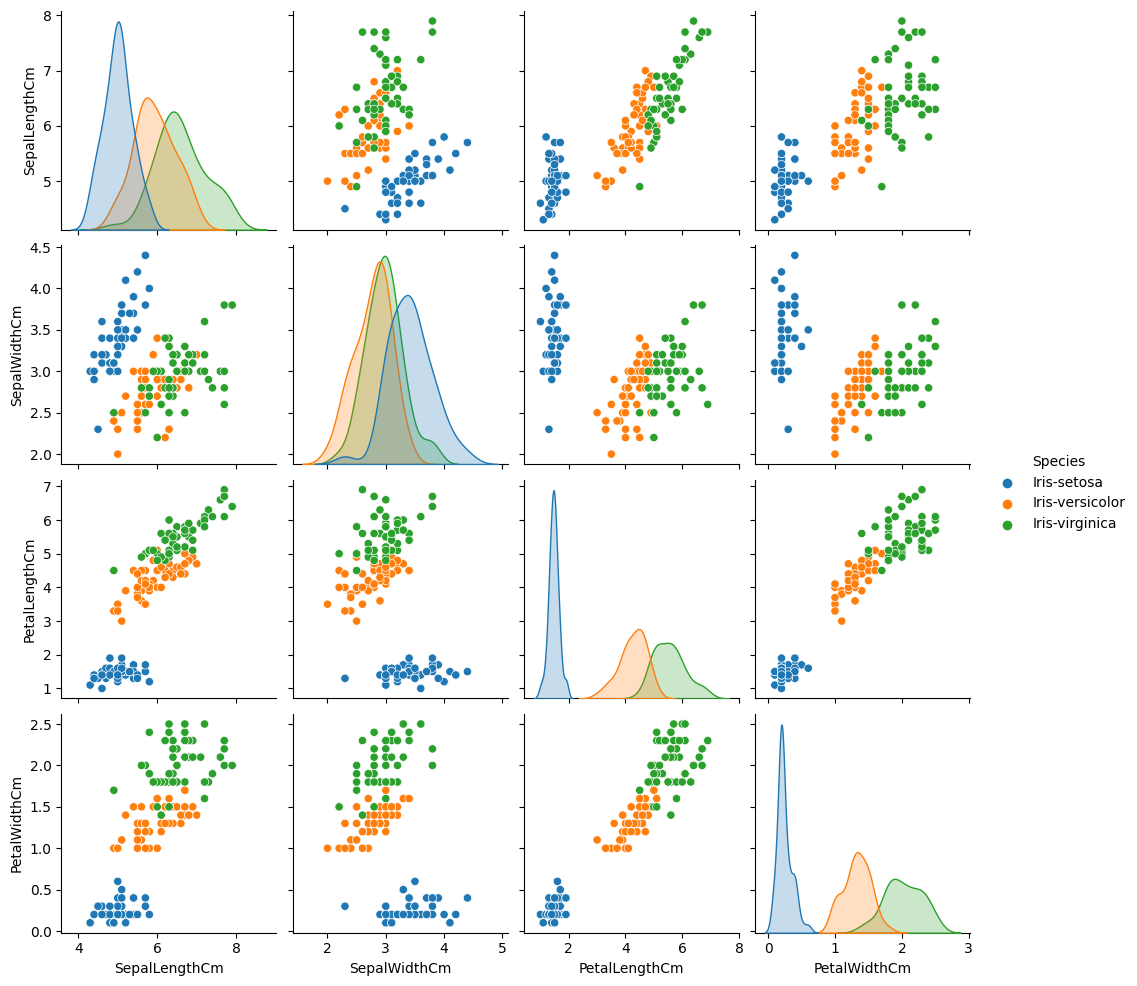

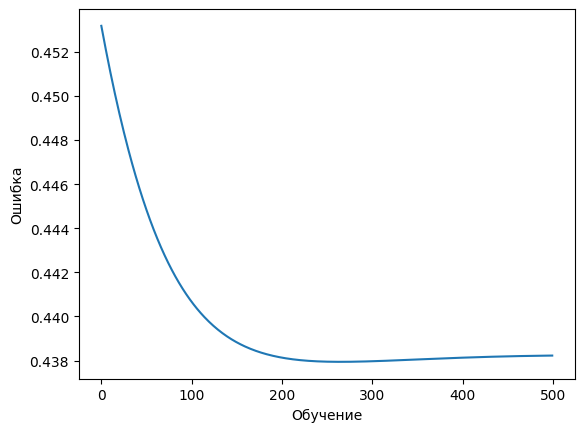

Точность нейронной сети 56.18%


In [2]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head())

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")


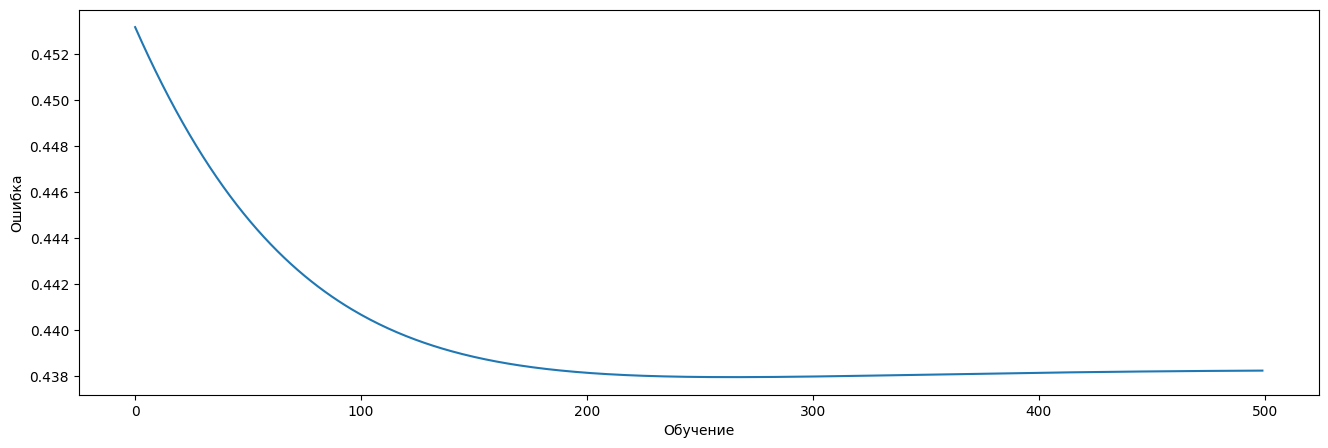

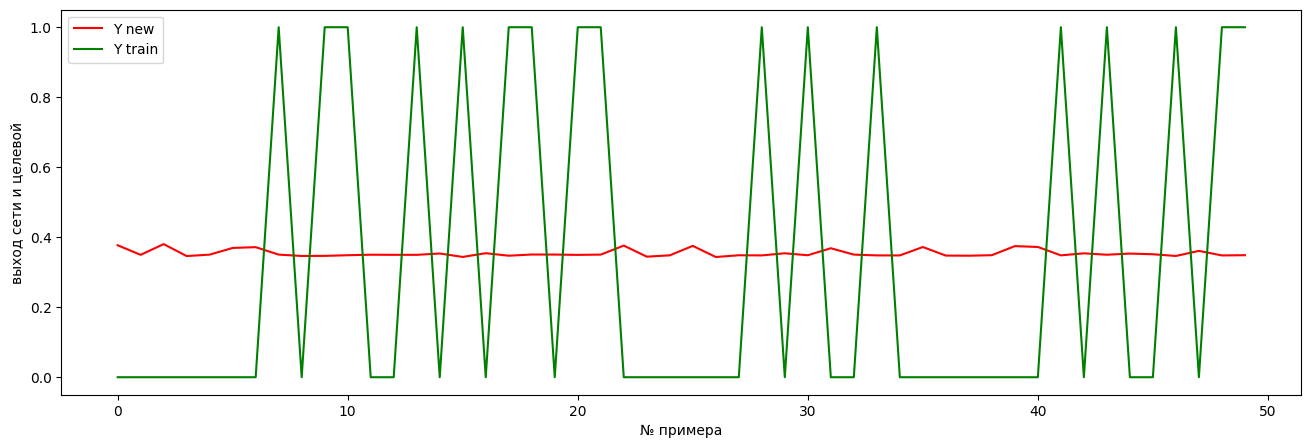

Аккуратность нейронной сети 56.18%


In [3]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

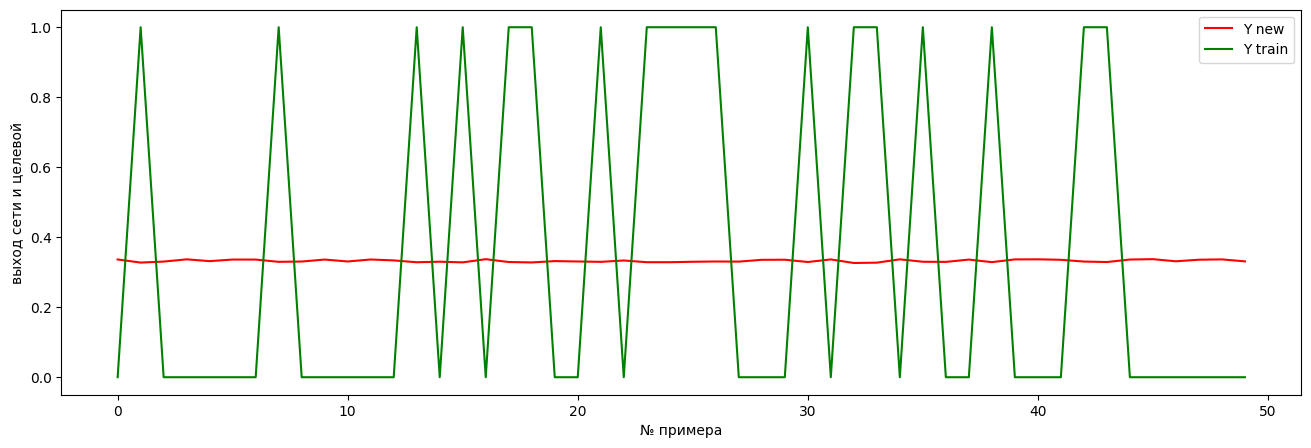

Аккуратность нейронной сети на тесте 54.79%


In [48]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

###подбор гиперпараметров###


увеличение количества эпох

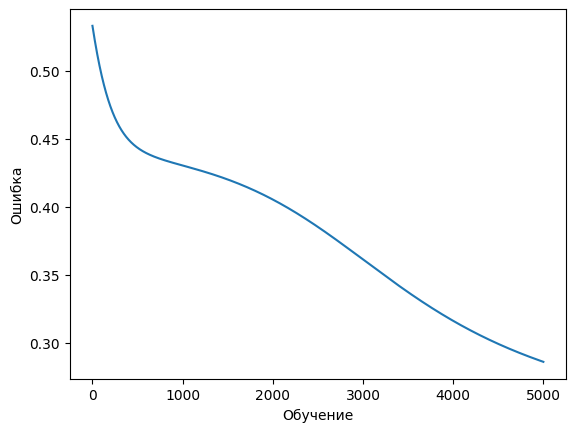

Точность нейронной сети 71.4%


In [4]:
#количество эпох - 5000
#lerning_rate = 0.001
#neuron number = 5

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(5000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

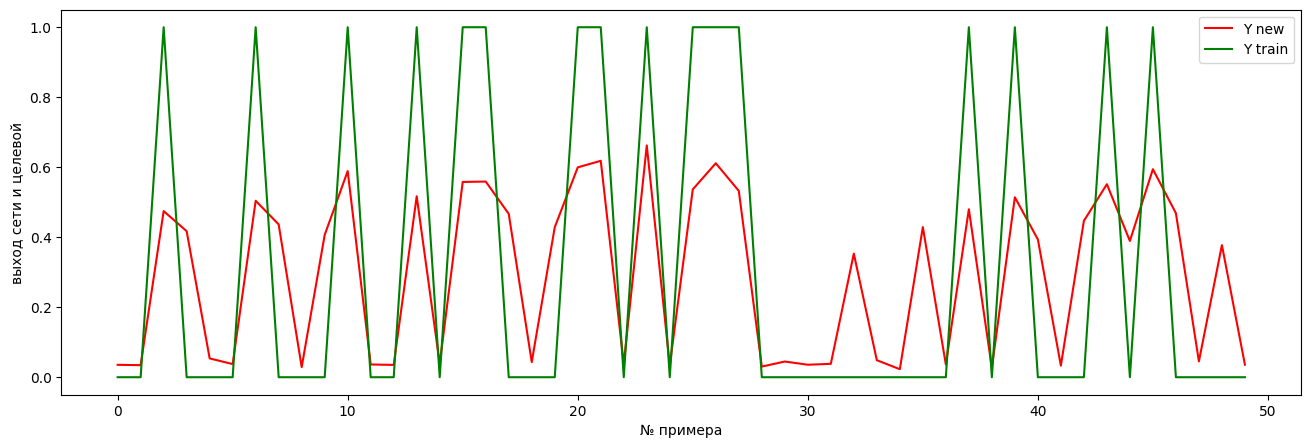

Аккуратность нейронной сети на тесте 75.48%


In [5]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

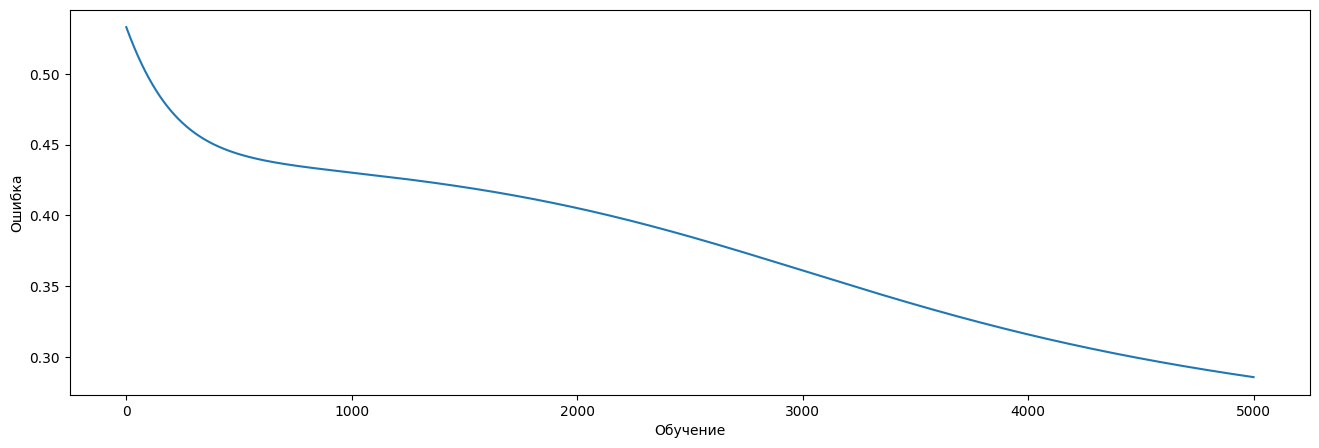

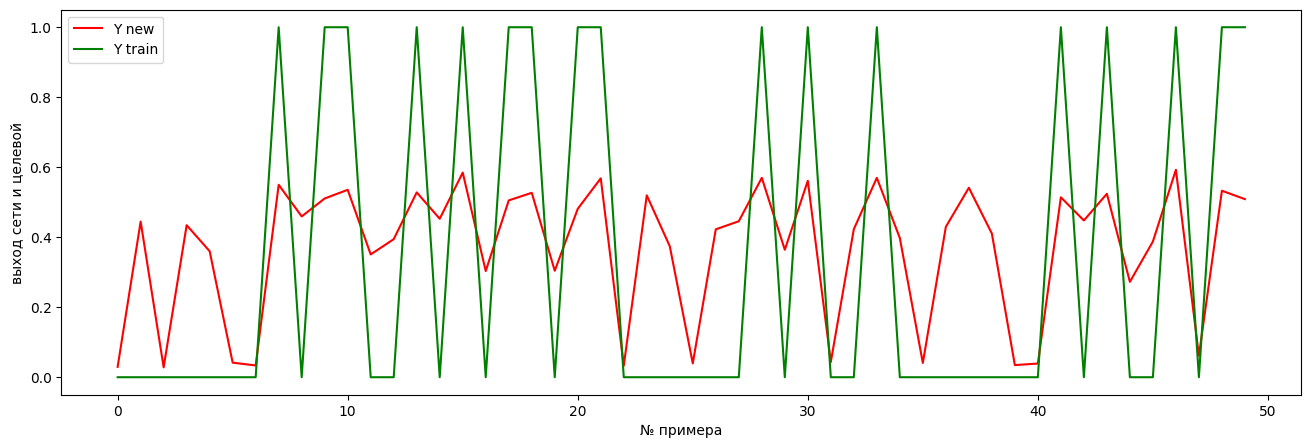

Аккуратность нейронной сети 71.4%


In [6]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

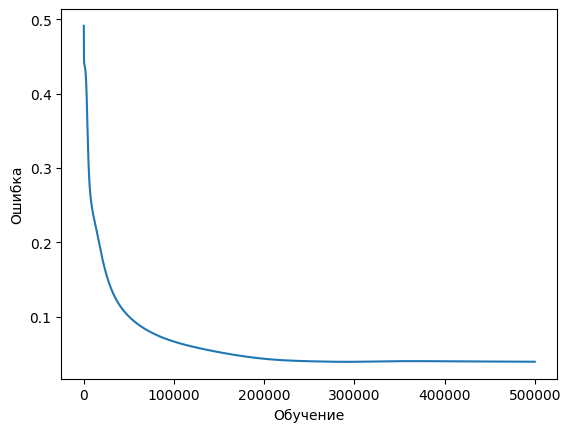

Точность нейронной сети 96.05%


In [7]:
#количество эпох = 500000
#learning_rate = 0.001
#neuron number = 5

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

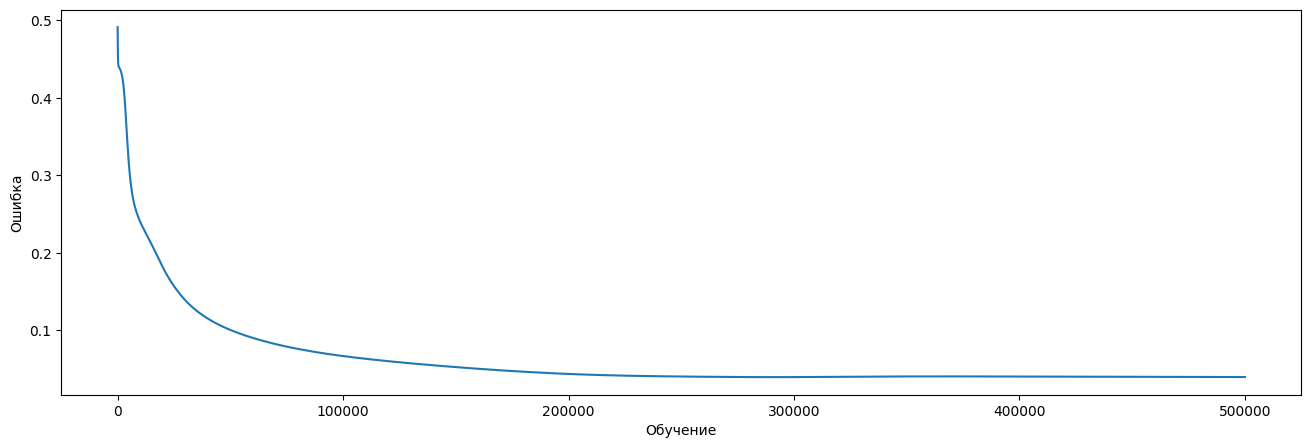

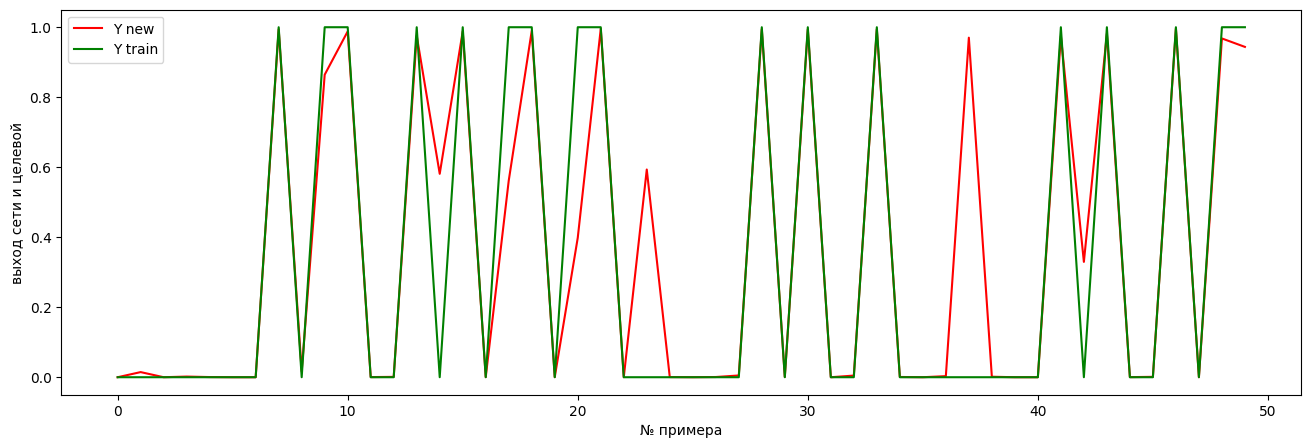

Аккуратность нейронной сети 96.05%


In [9]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

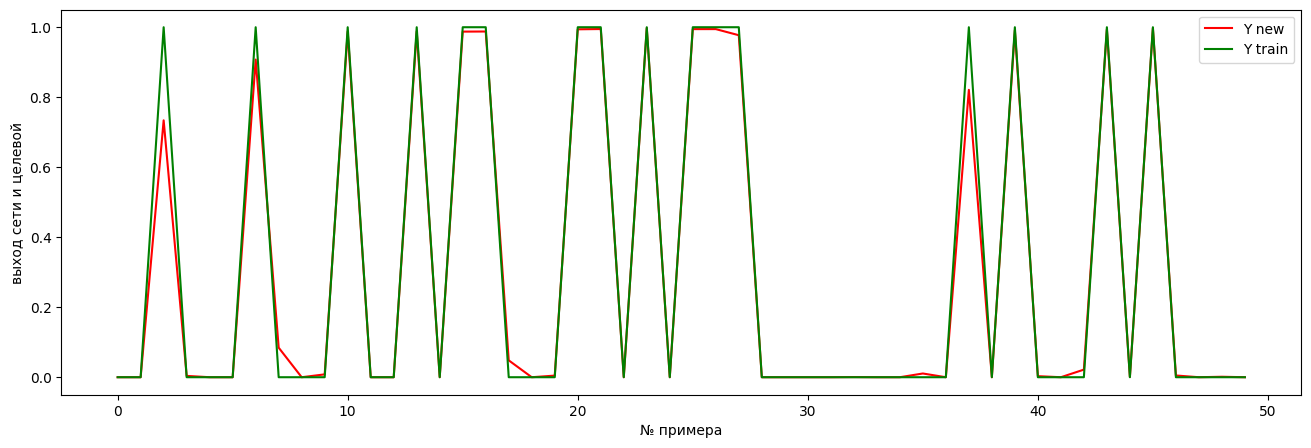

Аккуратность нейронной сети на тесте 98.75%


In [10]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

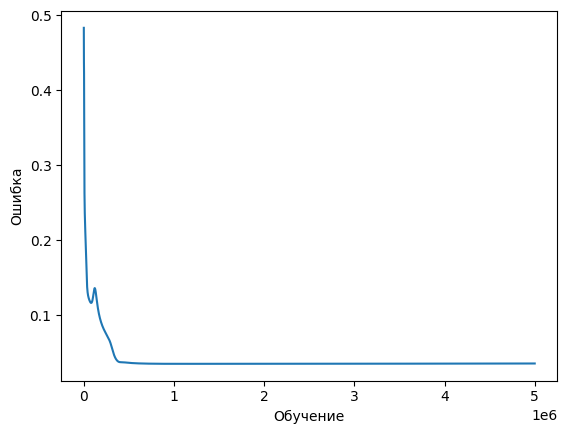

Точность нейронной сети 96.41%


In [18]:
#количество эпох = 5000000
#learning_rate = 0.001
#neuron number = 5


### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(5000000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

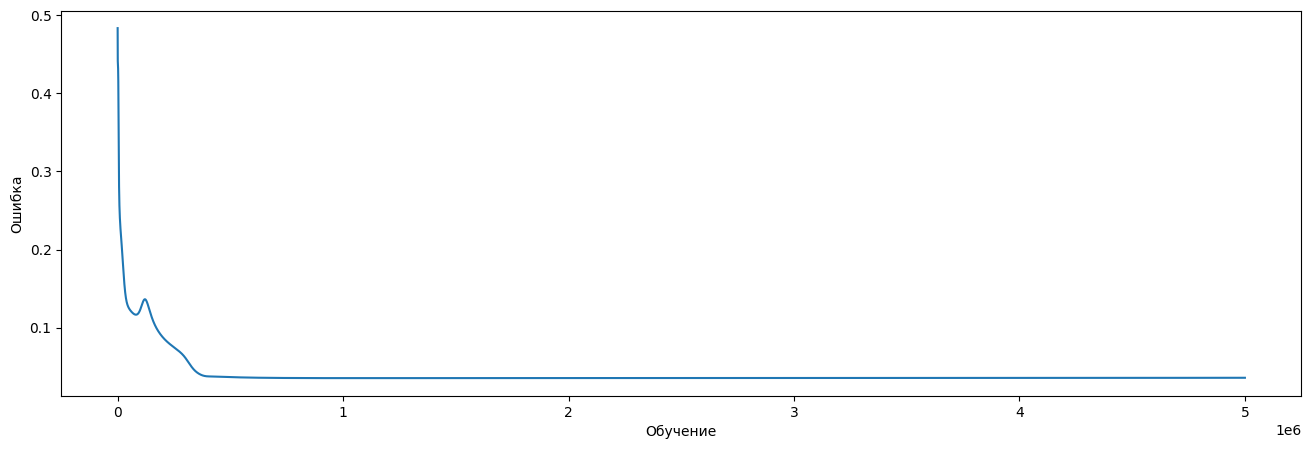

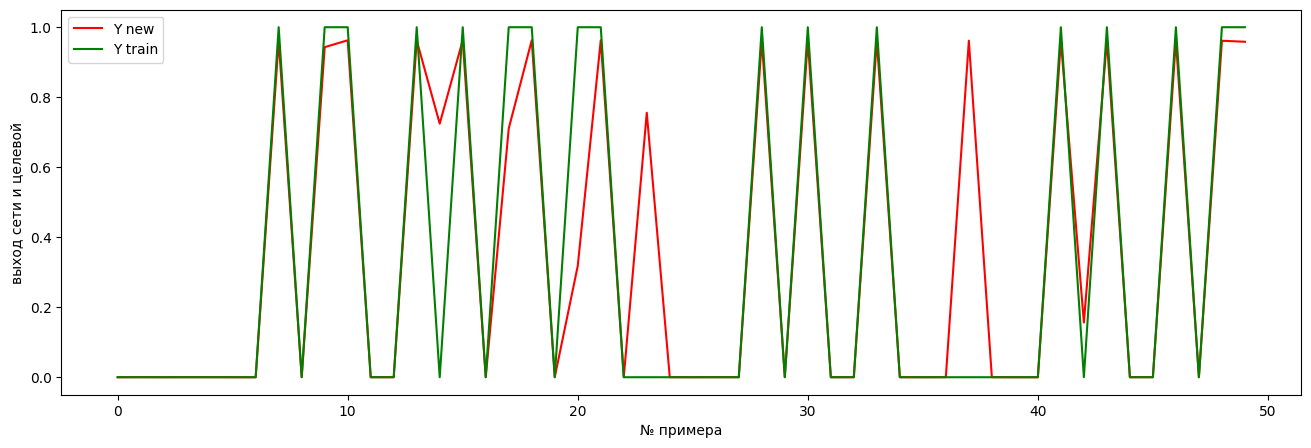

Аккуратность нейронной сети 96.41%


In [19]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

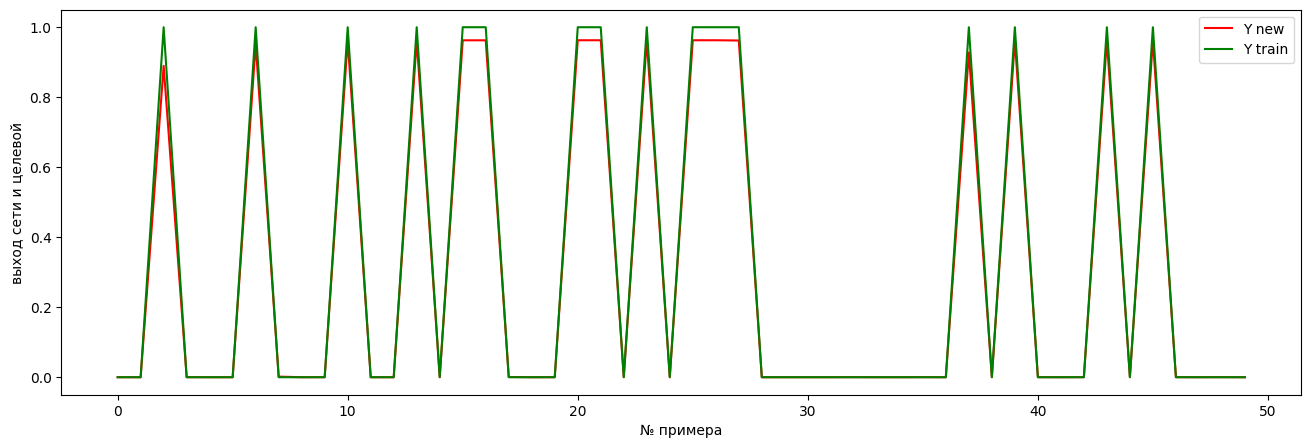

Аккуратность нейронной сети на тесте 99.04%


In [20]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

изменение гиперпараметров:
увеличение vs. уменьшение lerning rate


<ipython-input-2-e06861c67c72>:39: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


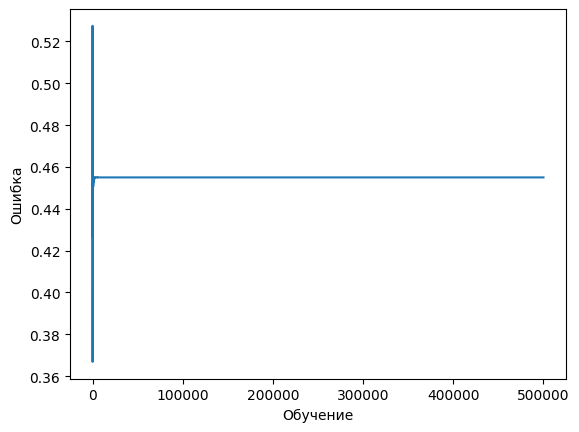

Точность нейронной сети 54.5%


In [21]:
#количество эпох = 500000
#learning_rate = 1
#neuron number = 5

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

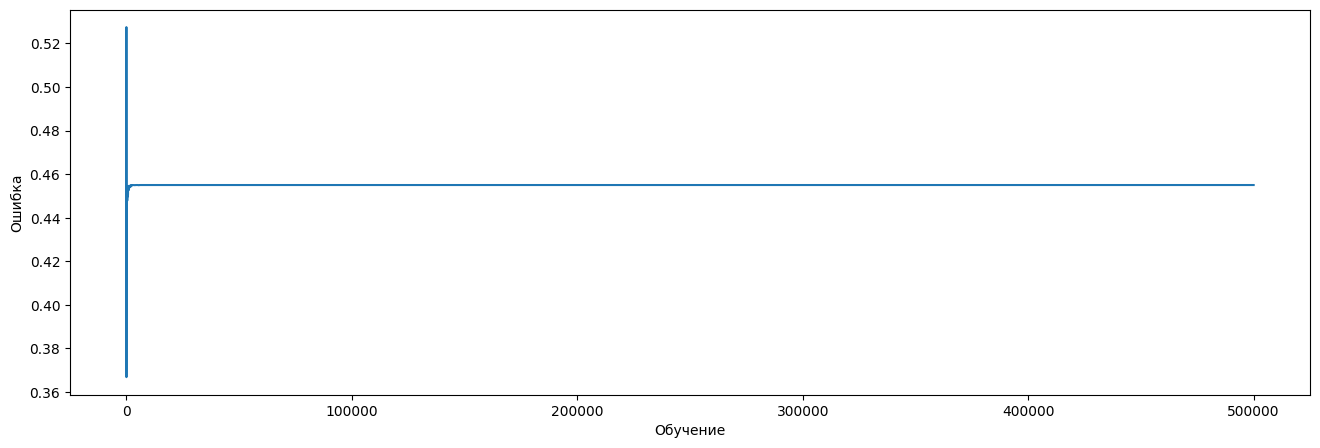

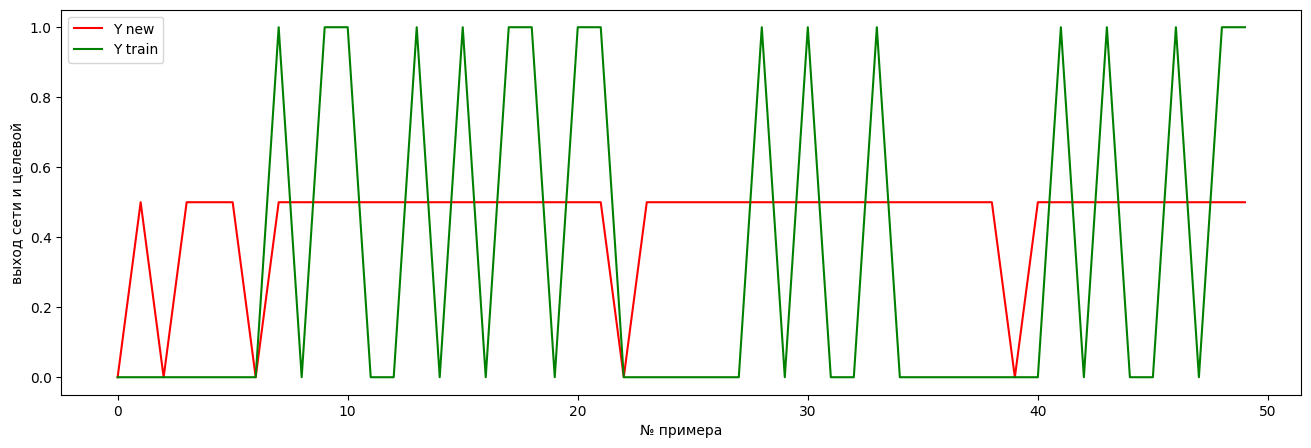

Аккуратность нейронной сети 54.5%


In [22]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

<ipython-input-2-e06861c67c72>:39: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


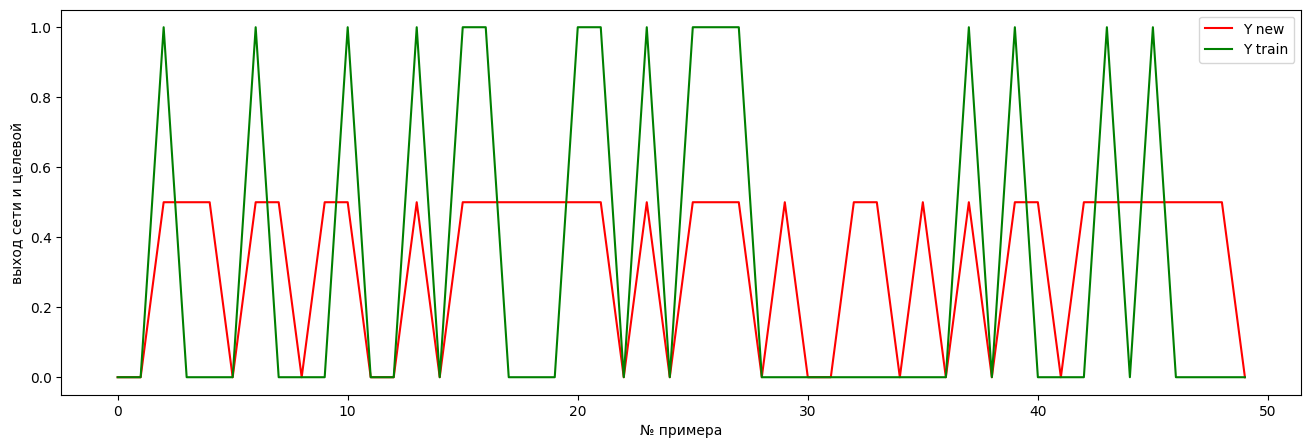

Аккуратность нейронной сети на тесте 67.0%


In [23]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

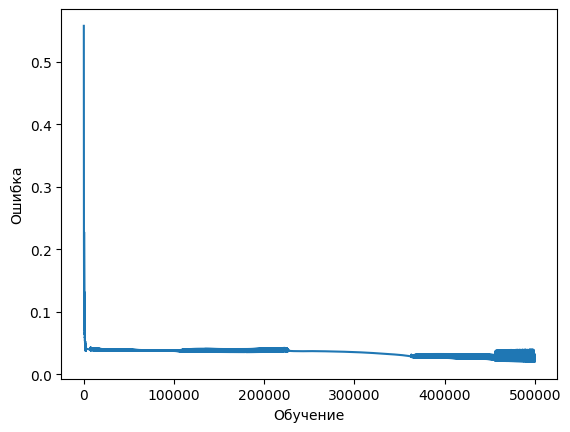

Точность нейронной сети 97.38%


In [24]:
#количество эпох = 500000
#learning_rate = 0.1
#neuron number = 5

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

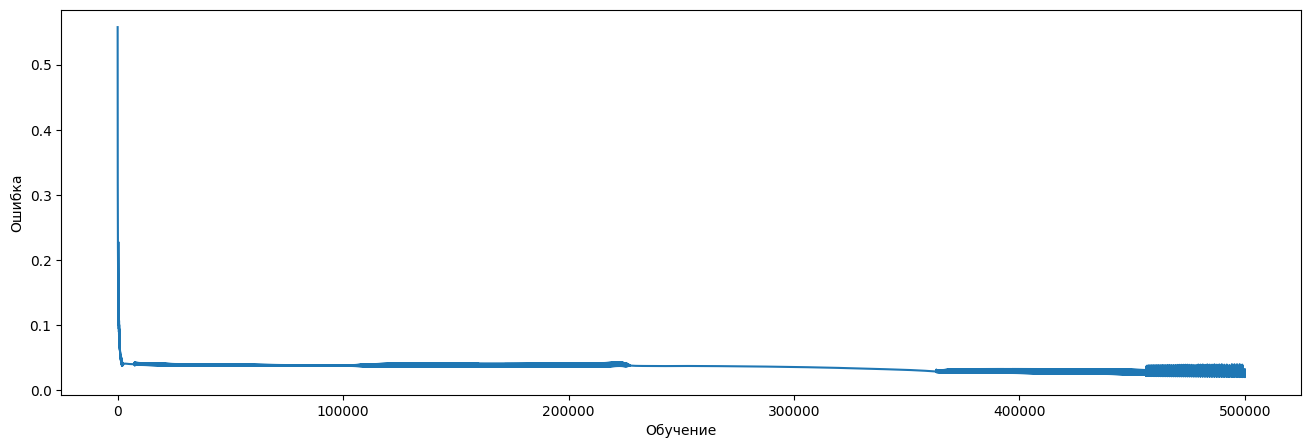

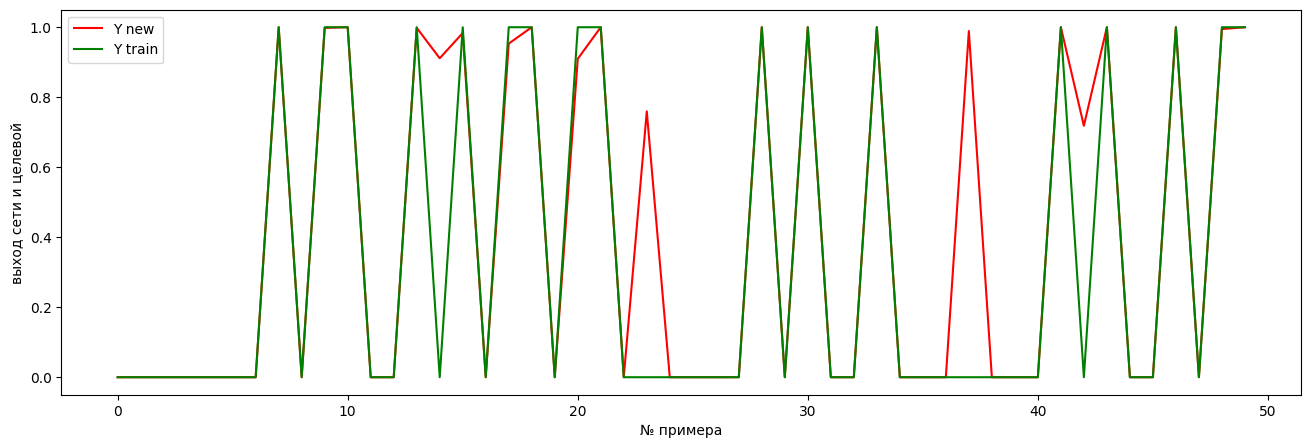

Аккуратность нейронной сети 97.38%


In [25]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

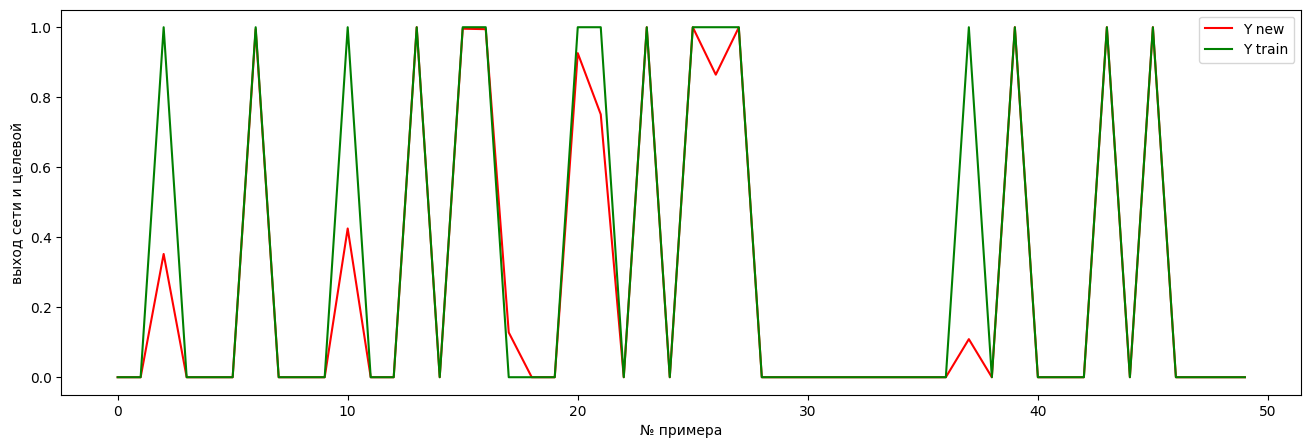

Аккуратность нейронной сети на тесте 96.43%


In [26]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

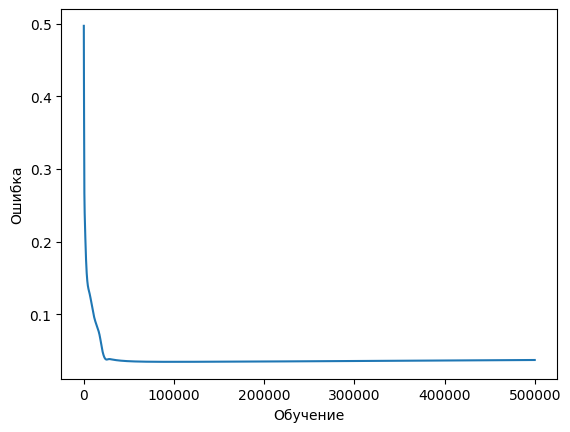

Точность нейронной сети 96.29%


In [27]:
#количество эпох = 500000
#learning_rate = 0.01
#neuron number = 5

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 0.01

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

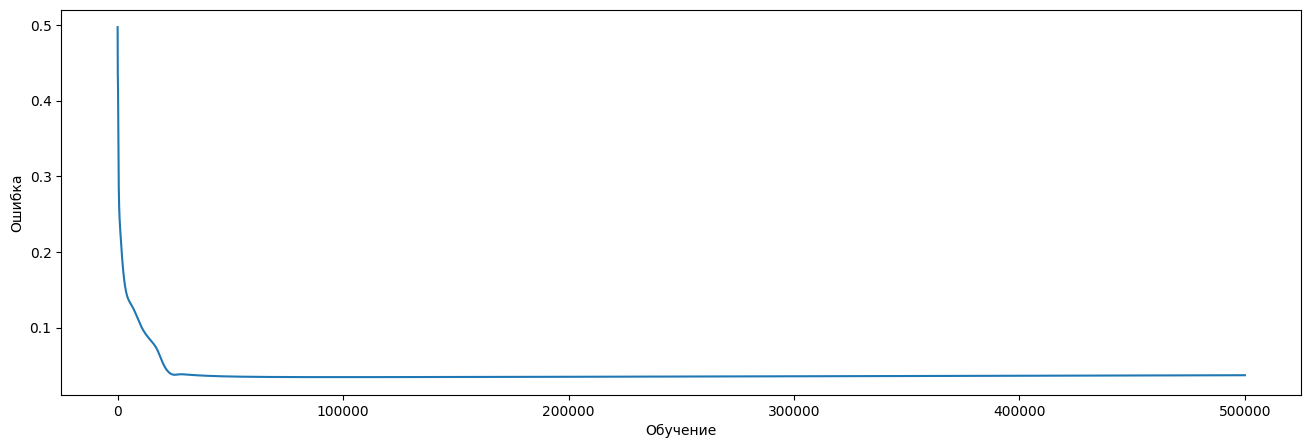

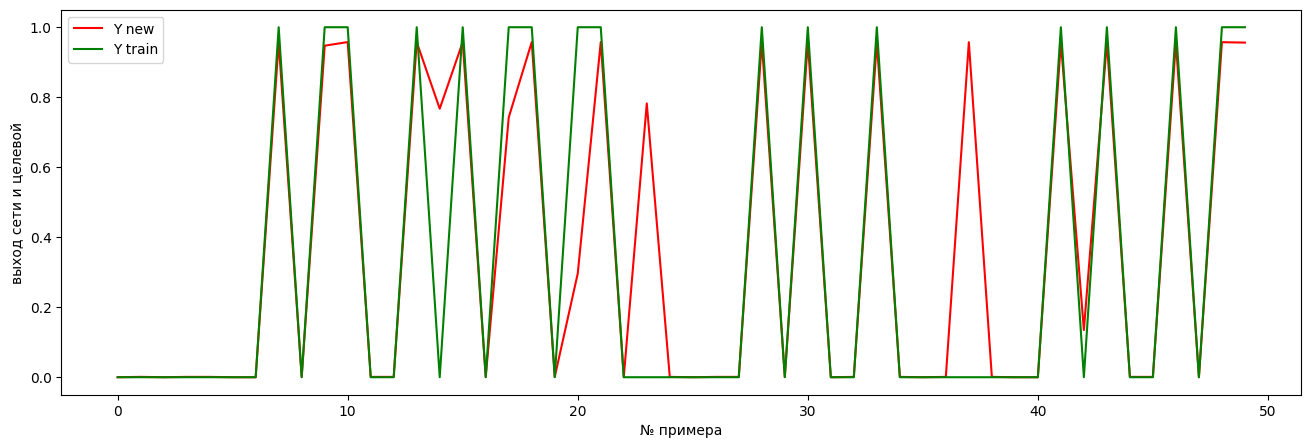

Аккуратность нейронной сети 96.29%


In [28]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

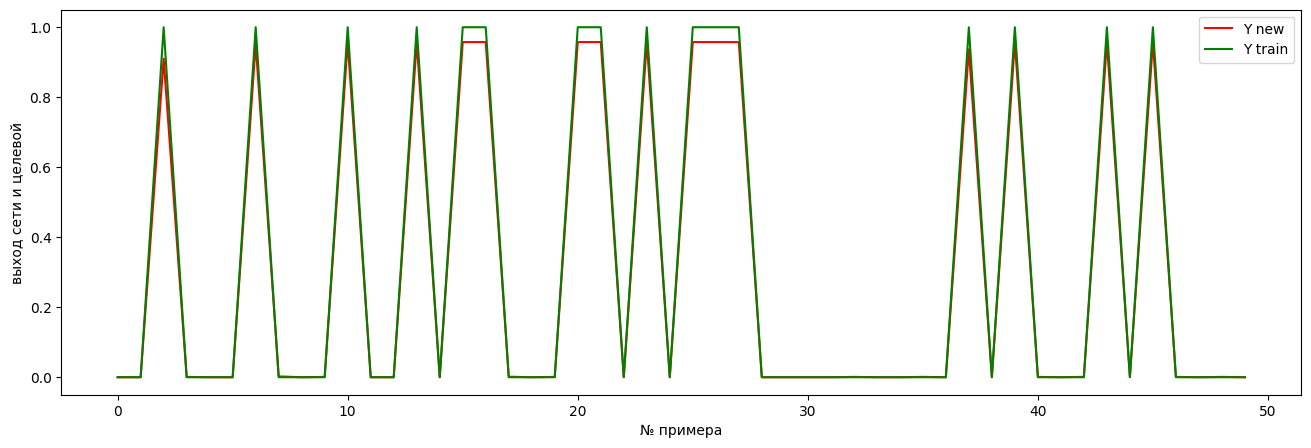

Аккуратность нейронной сети на тесте 98.94%


In [29]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

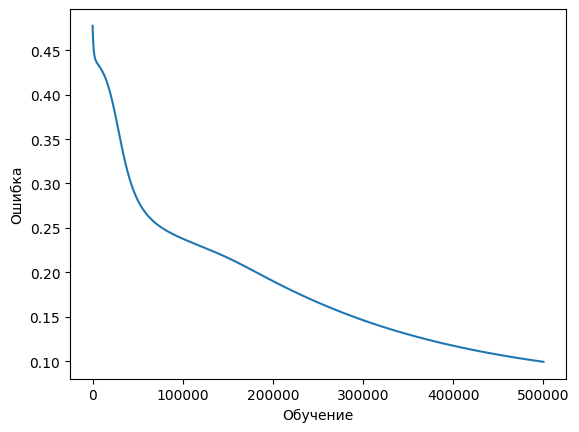

Точность нейронной сети 90.07%


In [30]:
#количество эпох = 500000
#learning_rate = 0.0001
#neuron number = 5

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1
# скорость обучения (learning rate)
lr = 0.0001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

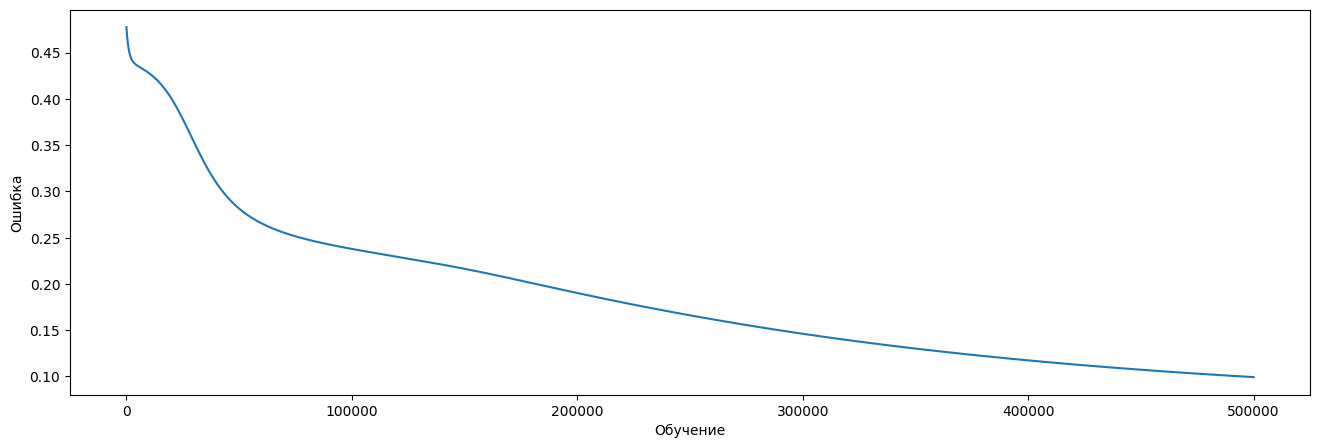

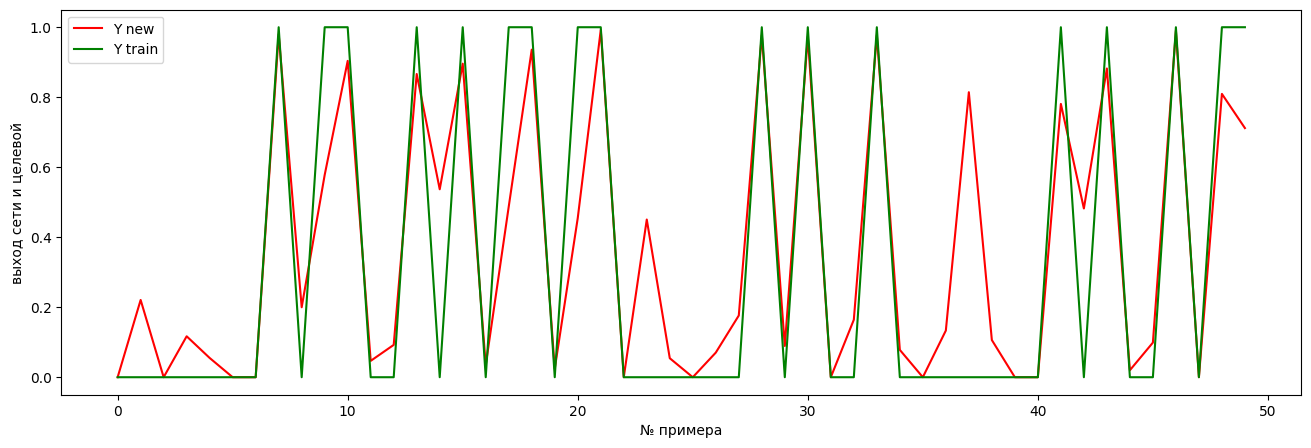

Аккуратность нейронной сети 90.07%


In [31]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

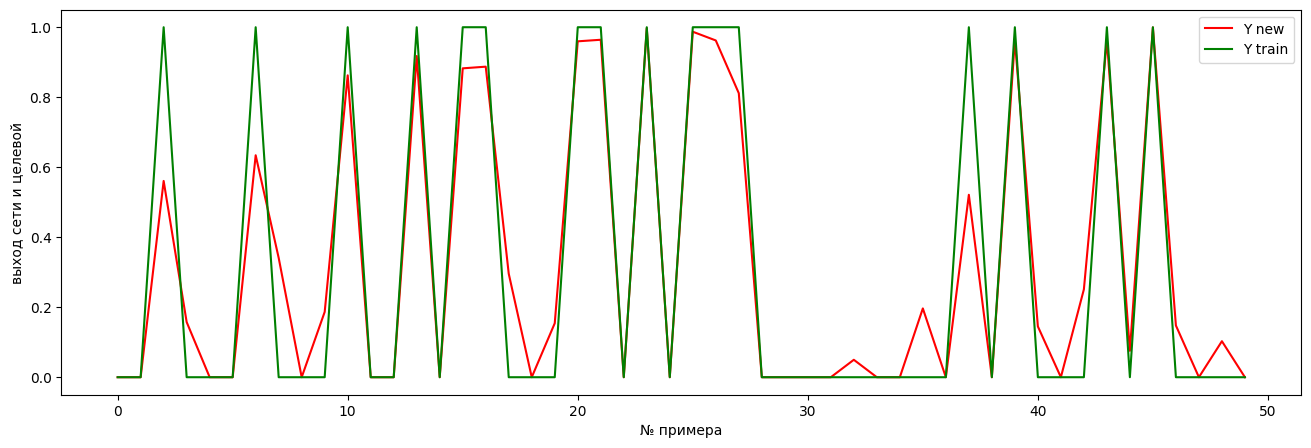

Аккуратность нейронной сети на тесте 92.76%


In [32]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

Увеличение ширины внутреннего слоя

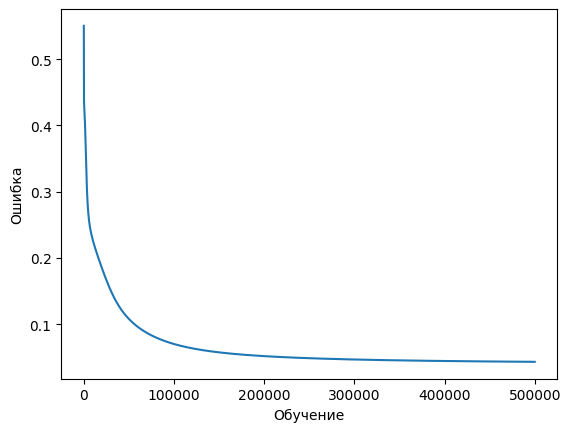

Точность нейронной сети 95.67%


In [33]:
#количество эпох = 500000
#learning_rate = 0.001
#neuron_numb = 10

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 10
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

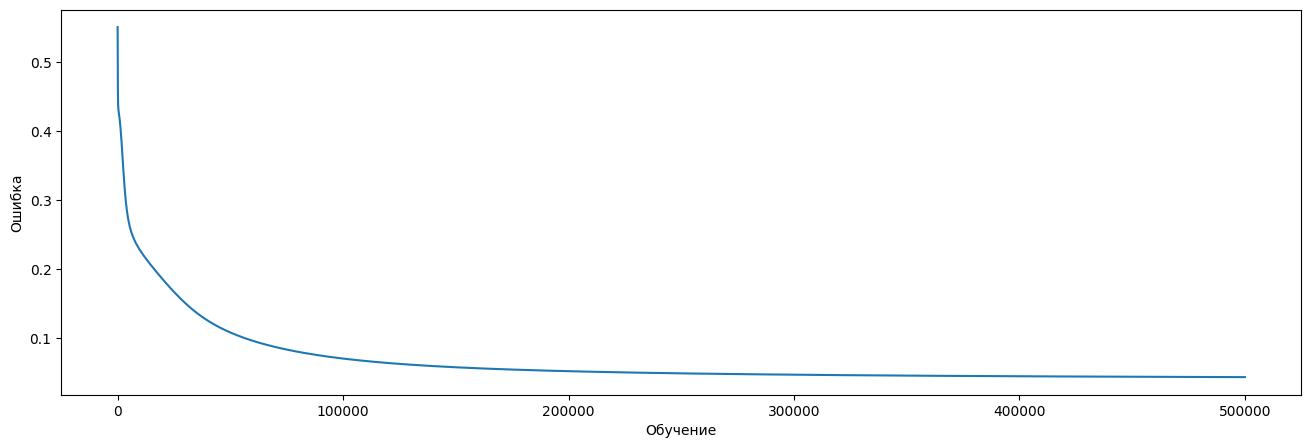

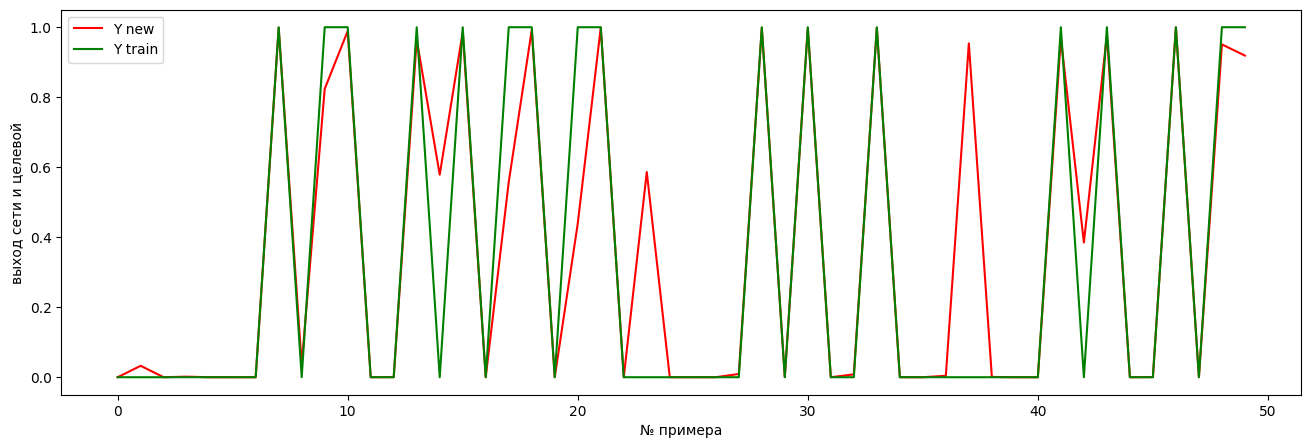

Аккуратность нейронной сети 95.67%


In [34]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

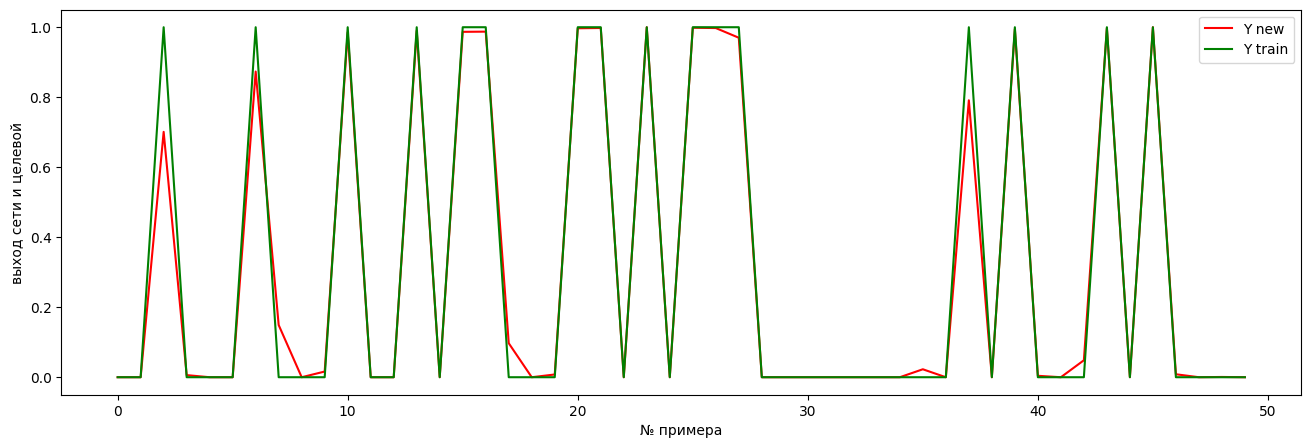

Аккуратность нейронной сети на тесте 98.3%


In [35]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

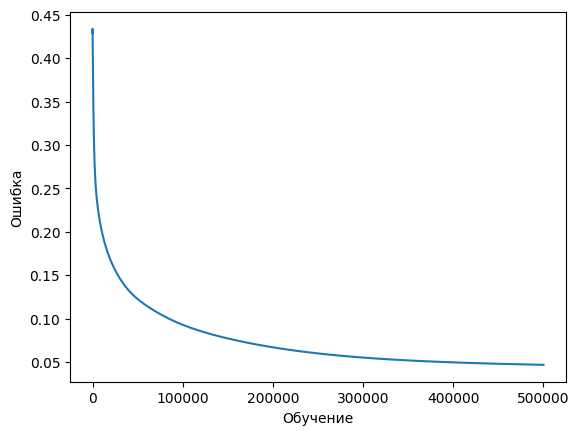

Точность нейронной сети 95.34%


In [36]:
#количество эпох = 500000
#learning_rate = 0.001
#neuron_numb = 100

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 100
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

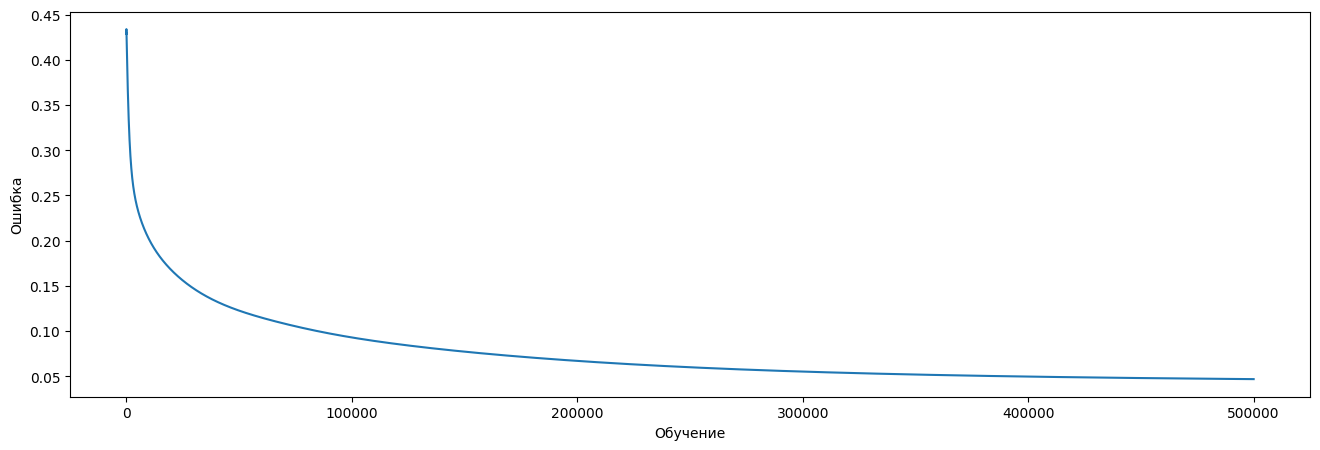

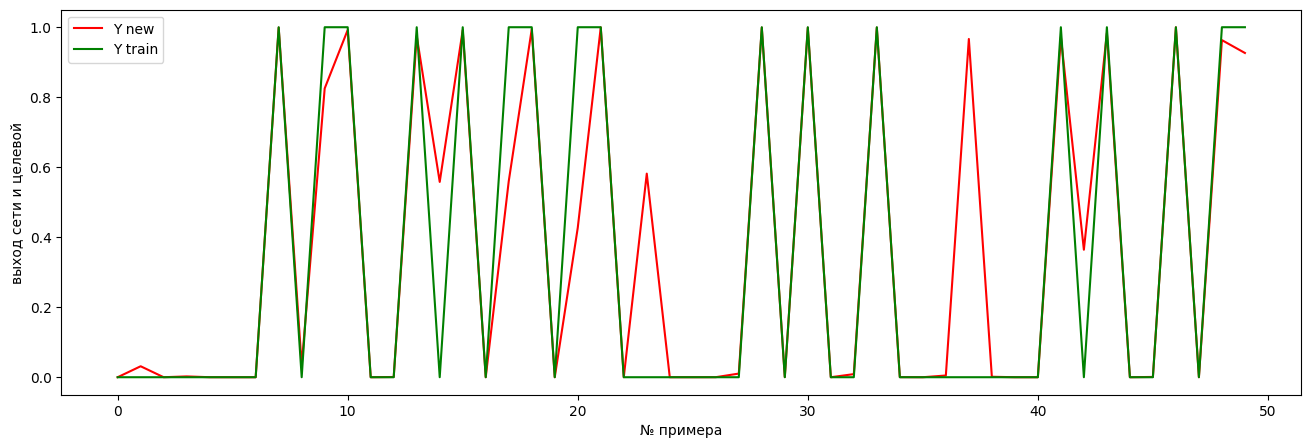

Аккуратность нейронной сети 95.34%


In [37]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

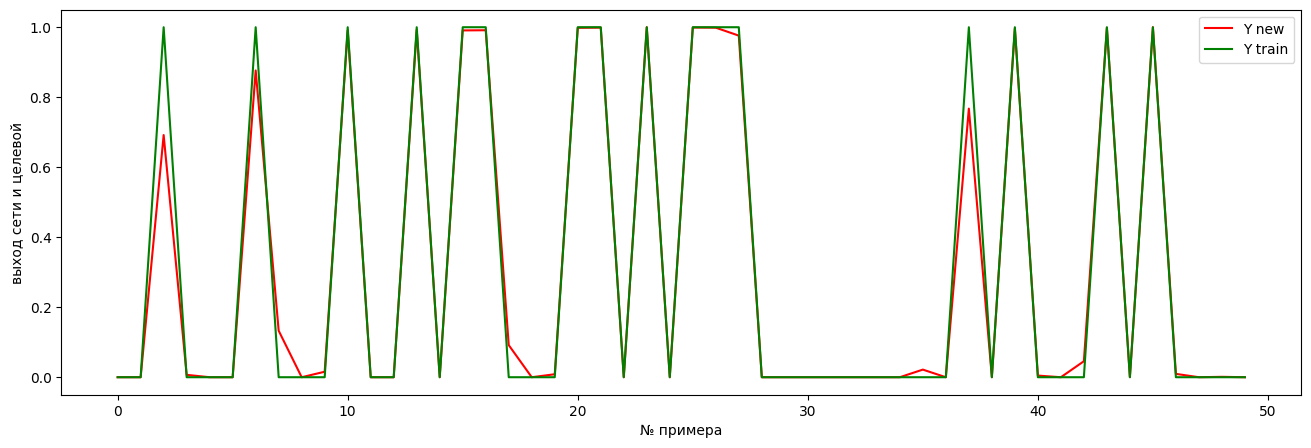

Аккуратность нейронной сети на тесте 97.83%


In [38]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

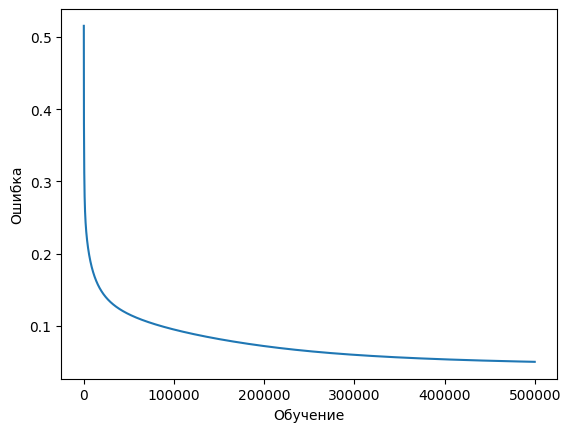

Точность нейронной сети 94.98%


In [45]:
#количество эпох = 500000
#learning_rate = 0.001
#neuron_numb = 300

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 300
w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
lr = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

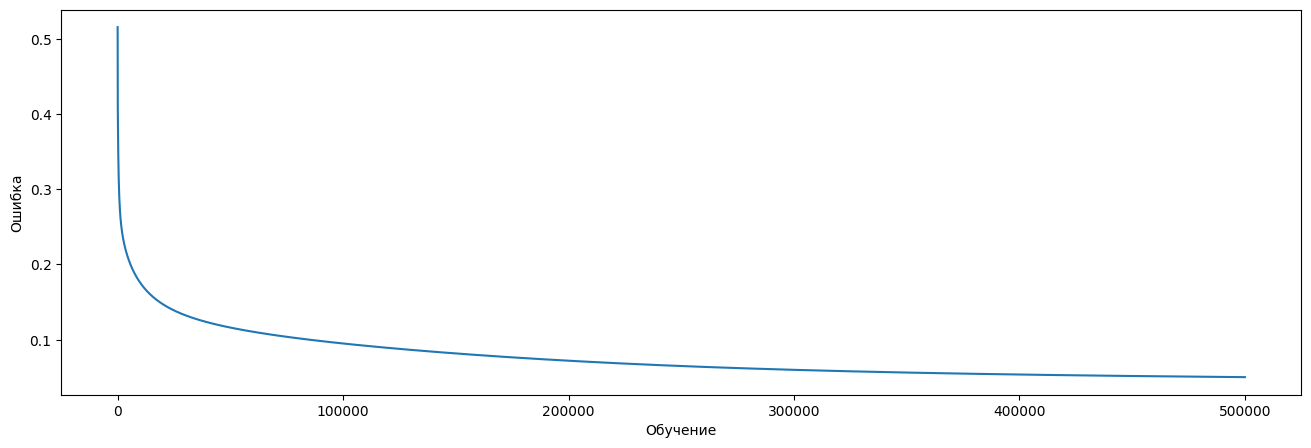

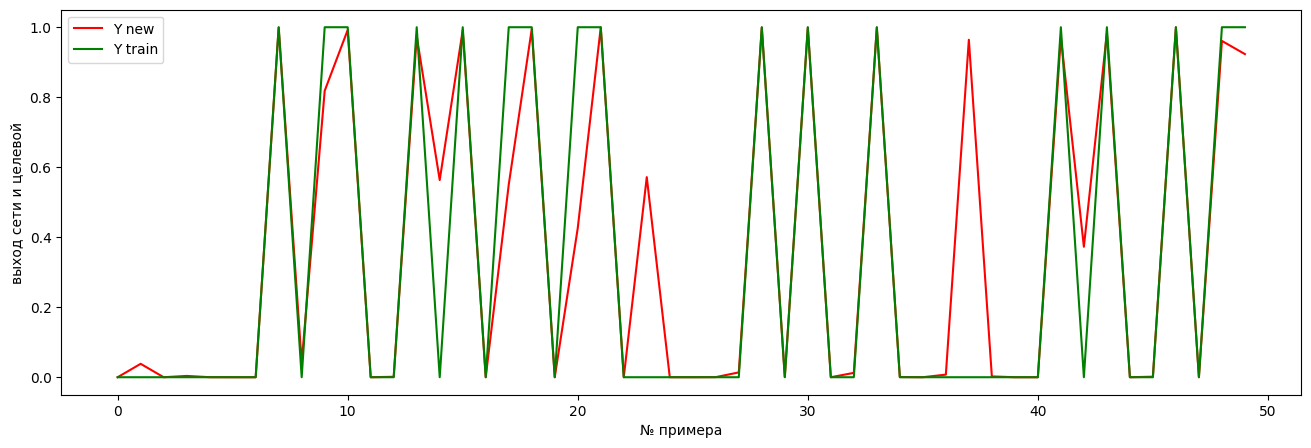

Аккуратность нейронной сети 94.98%


In [46]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

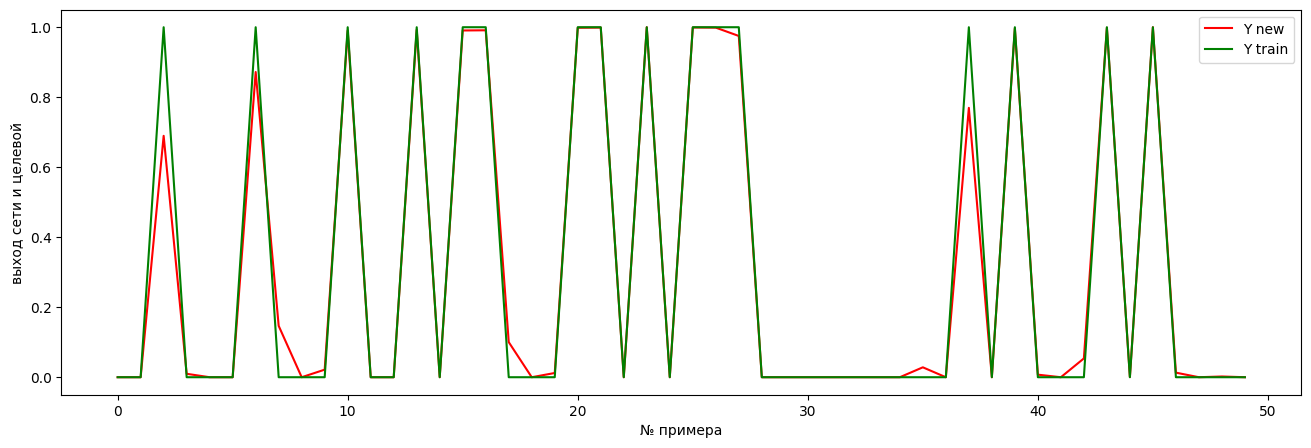

Аккуратность нейронной сети на тесте 97.51%


In [47]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

##hyperbolic tangent👍 Activation Function##

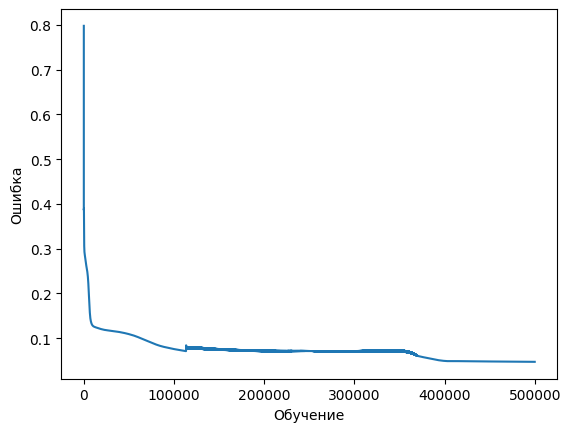

Точность нейронной сети 95.27%


In [42]:

#количество эпох = 500000
#learning_rate = 0.001
#neuron_numb = 5

# Hyperbolic Tangent (htan) Activation Function
def htan(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# htan derivative
def der_htan(x):
  return 1 - htan(x) * htan(x)

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
lr = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(500000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = htan(np.dot(layer0, w0))
    layer2 = htan(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * der_htan(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * der_htan(layer1)

    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

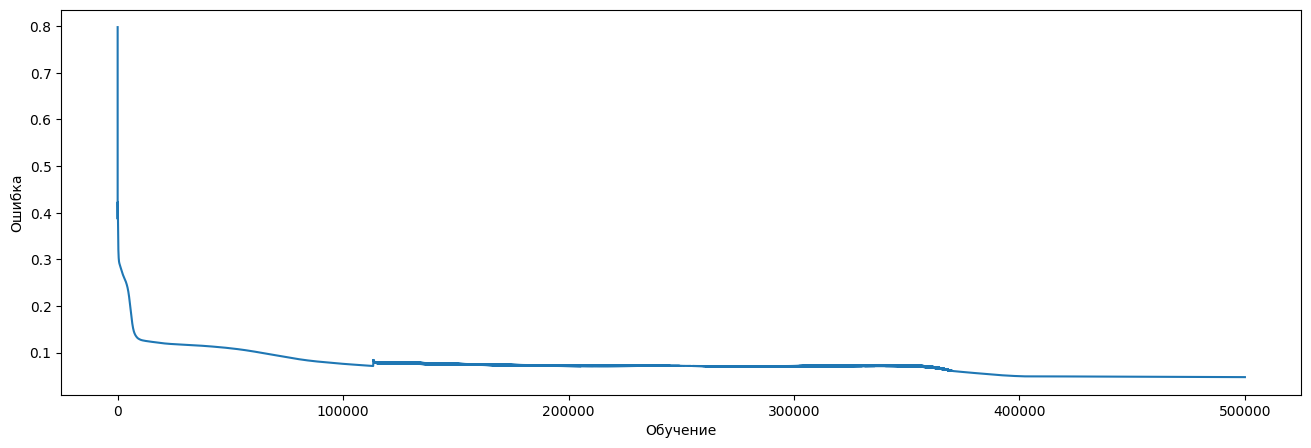

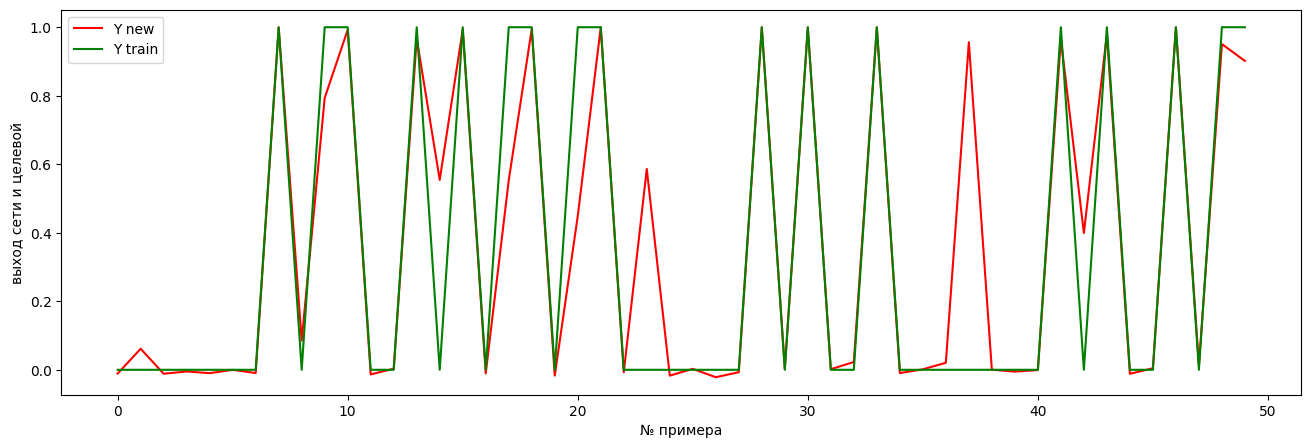

Аккуратность нейронной сети 95.27%


In [43]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

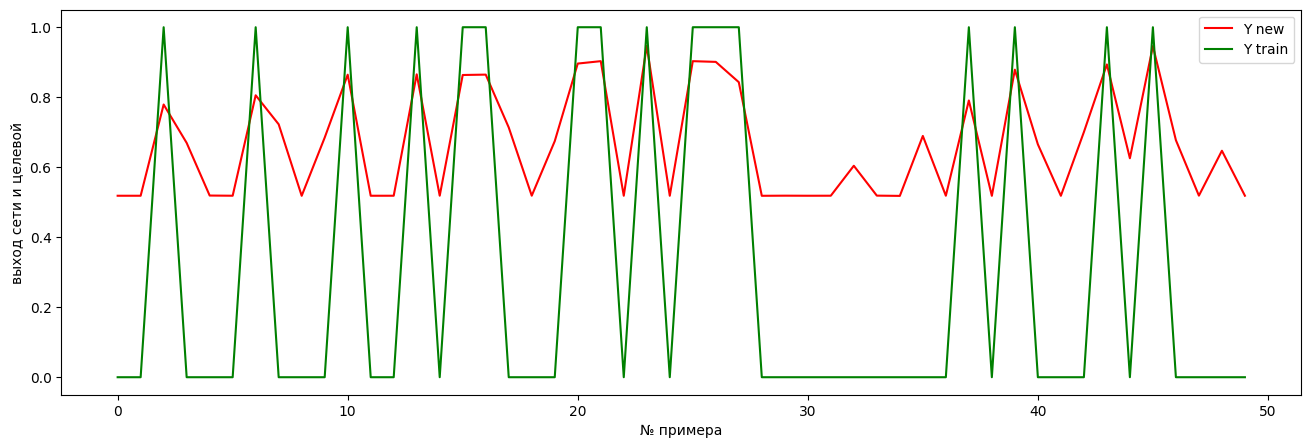

Аккуратность нейронной сети на тесте 64.27%


In [44]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t


N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show()

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

Вывод


**В рассматриваемом примере, с ростом числа эпох до определенного значения(500000 включительно), увеличивается точность нейронной сети, после - происходит переобучение. Увеличение числа нейронов (ширины) скрытого слоя (более 5)приводит к снижению точности. Идеальная скорость обучения - 0.001, увеличение или уменьшение ее ведет к переобучению и недообучению соответсвенно.

Использование гиперболического тангенса в качестве функции активации, - привело к довольно странным результатам, которые я не в состоянии интерпретировать🤷‍♀️

Хотела сначала сделать все красиво и запустить прогон и подбор гиперпараметров автоматически, однако не вполне поняла, как это сделать в условиях НС.Если есть возможность, хотелось бы на примере посмотреть, как это можно осуществить.

**
